In [334]:
import numpy as np
import matplotlib.pyplot as plt

In [346]:
data = np.genfromtxt("applesOranges.csv",dtype =np.float, delimiter =',')

data = data [1:]
x = data[:,:2]
y = data[:,2]

In [348]:
angle = np.linspace(0,np.pi/2,10)
print(np.cos(10))
xentry = np.append(np.cos(angle),-np.cos(angle[:-1][::-1]))
yentry = np.append(np.sin(angle),np.sin(angle[:-1][::-1]))
u=v = np.zeros(19)
print(angle,np.cos(angle))

-0.8390715290764524
[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633] [1.00000000e+00 9.84807753e-01 9.39692621e-01 8.66025404e-01
 7.66044443e-01 6.42787610e-01 5.00000000e-01 3.42020143e-01
 1.73648178e-01 6.12323400e-17]


In [349]:
np.append(np.array([1]),np.array([3]))[::-1]

array([3, 1])

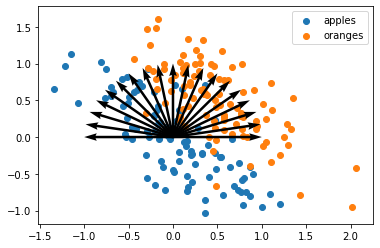

In [350]:
plt.scatter(x[y==0][:,0],x[y==0][:,1], label = 'apples')
plt.scatter(x[y==1][:,0],x[y==1][:,1], label = 'oranges')
plt.quiver(u,v, xentry, yentry,  angles ='xy', scale_units='xy', scale=1 )

plt.legend()
plt.show()

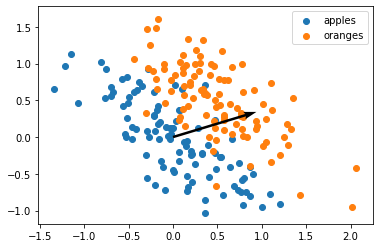

In [362]:
plt.scatter(x[y==0][:,0],x[y==0][:,1], label = 'apples')
plt.scatter(x[y==1][:,0],x[y==1][:,1], label = 'oranges')
plt.quiver(u[5],v[5], xentry[2], yentry[2],  angles ='xy', scale_units='xy', scale=1 )

plt.legend()
plt.show()

In [340]:
weightvectors = list(zip(xentry,yentry))
y_pred = lambda a, b : np.dot(a,b)>=0
predictions = np.array([sum([y_pred(weight,data) for data in x]==y)/len(y) for weight in weightvectors])
print(predictions)

[0.675 0.705 0.76  0.745 0.71  0.735 0.755 0.75  0.725 0.69  0.63  0.6
 0.565 0.52  0.505 0.465 0.42  0.35  0.325]


(0, 1)

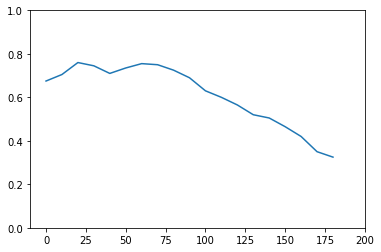

In [341]:
plt.plot(np.linspace(0,180,19), predictions)
plt.xlim(-10,200)
plt.ylim(0,1)

In [342]:
bestweight = weightvectors[np.argmax(predictions)]
print(np.argmax(predictions))
print(bestweight)

2
(0.9396926207859084, 0.3420201433256687)


In [457]:
allbias = np.linspace(-3,3,40)
y_pred = lambda weight, data, bias: np.dot(weight,data)-bias >= 0
predictions = [sum([y_pred(bestweight,data,bias) for data in x]==y)/len(y) for bias in allbias]
print(predictions)
print(np.min(predictions))

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.505, 0.51, 0.52, 0.52, 0.585, 0.64, 0.7, 0.775, 0.79, 0.775, 0.745, 0.685, 0.62, 0.575, 0.545, 0.515, 0.51, 0.505, 0.505, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
0.5


In [358]:
1 == True

True

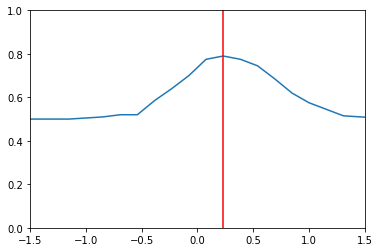

In [344]:
plt.plot(allbias, predictions)
plt.xlim(-1.5,1.5)
plt.ylim(0,1)
best_bias = allbias[np.argmax(predictions)]
plt.axvline(allbias[np.argmax(predictions)], color = 'r')

In [560]:
#calculate orthogonal vector
w2= np.array([0,1])
v2 = w2-np.dot(np.dot(bestweight,w2),bestweight)
np.dot(v2,bestweight)

0.0

(0.9396926207859084, 0.3420201433256687)


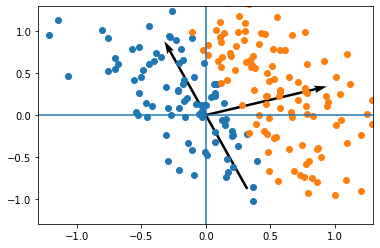

In [564]:
print(bestweight)
fig,ax = plt.subplots(1)
ax.quiver(0,0, bestweight[0], bestweight[1], angles='xy', scale_units='xy', scale=1)
ax.set_xlim(-1.3,1.3)
ax.set_ylim(-1.3,1.3)
ax.axvline(0)
ax.axhline(0)
ax.quiver(-v2[0],-v2[1], 2*v2[0], 2*v2[1], angles='xy', scale_units='xy', scale=1)

predictions = np.array([y_pred(bestweight,data,best_bias) for data in x])
ax.scatter(x[predictions == 0][:,0],x[predictions == 0][:,1])
ax.scatter(x[predictions == 1][:,0],x[predictions == 1][:,1])